In [1]:
import seaborn as sns
data = sns.load_dataset('tips')

In [ ]:
sns.

In [6]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Chi-Square 

In [53]:
import pandas as pd
import numpy as np

In [15]:
from scipy.stats import chi2_contingency

In [57]:
ar = np.asarray(pd.crosstab(index =data.smoker, columns=[data.sex]))

In [58]:
chi2_contingency(ar)

(0.008763290531773594, 0.925417020494423, 1, array([[59.84016393, 33.15983607],
        [97.15983607, 53.84016393]]))

In [59]:
ar

array([[60, 33],
       [97, 54]], dtype=int64)

In [72]:
pd.crosstab(index =data.smoker, columns=[data.sex])

sex,Male,Female
smoker,,
Yes,60,33
No,97,54


if you want to add another column it will disect the data further

In [76]:
pd.crosstab(index =data.smoker, columns=[data.sex,data.time])

sex     Male        Female       
time   Lunch Dinner  Lunch Dinner
smoker                           
Yes       13     47     10     23
No        20     77     25     29

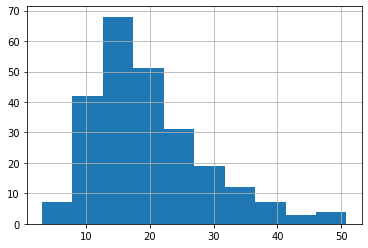

In [80]:
data.total_bill.hist();

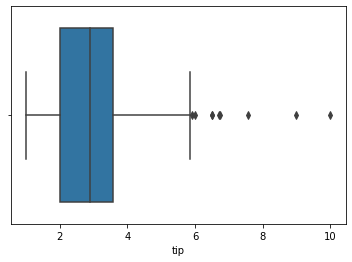

In [84]:
sns.boxplot(data.tip)

In [86]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Skewness and Kurtosis

In [87]:
from scipy.stats import kurtosis, skew

In [90]:
skew(data.total_bill)

1.1262346334818638

In [91]:
kurtosis(data.total_bill)

1.1691681323851366

# t-test

In [92]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [93]:
ttest_ind(data.total_bill, data.tip)

Ttest_indResult(statistic=29.1067945590078, pvalue=1.4419939457083578e-108)

In [98]:
ttest_ind_from_stats(data.total_bill.mean(), data.total_bill.std(),len(data)
                    ,data.tip.mean(), data.tip.std(),len(data),equal_var=False)

Ttest_indResult(statistic=29.106794559007806, pvalue=5.504923127938151e-83)

# Anova

In [99]:
from scipy.stats import f_oneway

In [112]:
f_oneway(data[data["day"]== "Sun"]["total_bill"],data[data["day"]== "Sat"]["total_bill"]
        ,data[data["day"]== "Thur"]["total_bill"])

F_onewayResult(statistic=3.200546290871032, pvalue=0.042626778157702695)

In [130]:
from statsmodels.stats.multicomp import MultiComparison,tukeyhsd

In [131]:
t = MultiComparison(data.total_bill,data.day)

In [134]:
print(t.tukeyhsd())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Sat   3.2898 0.4554 -2.4802  9.0598  False
   Fri    Sun   4.2584 0.2373 -1.5859 10.1028  False
   Fri   Thur   0.5312    0.9 -5.4437   6.506  False
   Sat    Sun   0.9686 0.8921 -2.6089  4.5462  False
   Sat   Thur  -2.7586 0.2375 -6.5456  1.0284  False
   Sun   Thur  -3.7273 0.0669 -7.6266  0.1721  False
----------------------------------------------------


In [135]:
tt = pairwise_tukeyhsd(data.total_bill,data.day, alpha=.05)

In [141]:
tt.pvalues

array([0.45541799, 0.23726348, 0.9       , 0.89211804, 0.23747568,
       0.06688935])

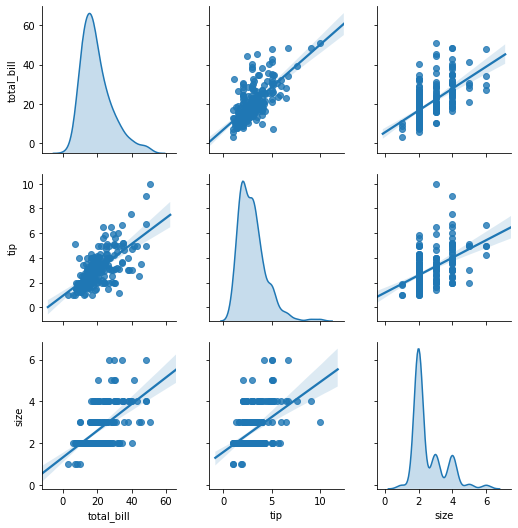

In [144]:
sns.pairplot(data,kind="reg",diag_kind="kde")

In [145]:
from scipy.stats import norm